In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df_uso_internet = pd.read_csv('indice_uso_internet_regioes.csv')

In [37]:
df_uso_internet = df_uso_internet.pivot(
    index='Grande Região',
    columns='Ano',
    values='Escala'
)
df_uso_internet

Ano,2016,2017,2018,2019,2021,2022,2023
Grande Região,,,,,,,
Centro-Oeste,0.075348,0.075846,0.076028,0.076018,0.075981,0.076928,0.078149
Nordeste,0.264555,0.263901,0.263397,0.263637,0.262928,0.263278,0.262868
Norte,0.077080,0.078305,0.079125,0.079716,0.081258,0.081449,0.082121
Sudeste,0.435870,0.434866,0.434442,0.434247,0.434112,0.432843,0.431491
Sul,0.147146,0.147082,0.147008,0.146382,0.145722,0.145501,0.145373


In [38]:
df_densidade_demo = pd.read_excel('densidade_demografica.xlsx')

In [39]:
sul = [
    'Rio Grande do Sul',
    'Santa Catarina',
    'Paraná'
]
df_densidade_demo_sul = df_densidade_demo[df_densidade_demo['Unidades da federação'].isin(sul)].reset_index(drop=True)
df_densidade_demo_sul['habitantes por km²'] = df_densidade_demo_sul['habitantes por km²'].str.replace(',', '.')
df_densidade_demo_sul['habitantes por km²'] = df_densidade_demo_sul['habitantes por km²'].astype(float)
df_densidade_demo_sul['habitantes por km²'].skew()

np.float64(0.24054375375340448)

In [40]:
sudeste = [
    'Espírito Santo',
    'São Paulo',
    'Minas Gerais',
    'Rio de Janeiro'
]
df_densidade_demo_sudeste = df_densidade_demo[df_densidade_demo['Unidades da federação'].isin(sudeste)].reset_index(drop=True)
df_densidade_demo_sudeste['habitantes por km²'] = df_densidade_demo_sudeste['habitantes por km²'].str.replace(',', '.')
df_densidade_demo_sudeste['habitantes por km²'] = df_densidade_demo_sudeste['habitantes por km²'].astype(float)
df_densidade_demo_sudeste['habitantes por km²'].skew()

np.float64(1.1188286857049838)

In [41]:
centro_oeaste = [
    'Mato Grosso',
    'Mato Grosso do Sul',
    'Goiás'
]
df_densidade_demo_co = df_densidade_demo[df_densidade_demo['Unidades da federação'].isin(centro_oeaste)].reset_index(drop=True)
df_densidade_demo_co['habitantes por km²'] = df_densidade_demo_co['habitantes por km²'].str.replace(',', '.')
df_densidade_demo_co['habitantes por km²'] = df_densidade_demo_co['habitantes por km²'].astype(float)
df_densidade_demo_co['habitantes por km²'].skew()

np.float64(1.397159606368654)

In [42]:
nordeste = [
    'Alagoas',
    'Sergipe',
    'Bahia',
    'Rio Grande do Norte',
    'Piauí',
    'Ceará',
    'Maranhão',
    'Pernambuco',
    'Paraíba'
]
df_densidade_demo_ne = df_densidade_demo[df_densidade_demo['Unidades da federação'].isin(nordeste)].reset_index(drop=True)
df_densidade_demo_ne['habitantes por km²'] = df_densidade_demo_ne['habitantes por km²'].str.replace(',', '.')
df_densidade_demo_ne['habitantes por km²'] = df_densidade_demo_ne['habitantes por km²'].astype(float)
df_densidade_demo_ne['habitantes por km²'].skew()

np.float64(-0.06078049860569931)

In [43]:
norte = [
    'Roraima',
    'Rôndonia',
    'Pará',
    'Amazonas',
    'Tocantis'
]
df_densidade_demo_norte = df_densidade_demo[df_densidade_demo['Unidades da federação'].isin(norte)].reset_index(drop=True)
df_densidade_demo_norte['habitantes por km²'] = df_densidade_demo_norte['habitantes por km²'].str.replace(',', '.')
df_densidade_demo_norte['habitantes por km²'] = df_densidade_demo_norte['habitantes por km²'].astype(float)
df_densidade_demo_norte['habitantes por km²'].skew()

np.float64(1.6915443448609653)

In [44]:
mediana_norte = df_densidade_demo_norte['habitantes por km²'].median()
mediana_ne = df_densidade_demo_ne['habitantes por km²'].median()
mediana_sudeste = df_densidade_demo_sudeste['habitantes por km²'].median()
mediana_co = df_densidade_demo_co['habitantes por km²'].median()
mediana_sul = df_densidade_demo_sul['habitantes por km²'].median()

In [45]:
densidades = [
    mediana_co,
    mediana_ne,
    mediana_norte,
    mediana_sudeste,
    mediana_sul
]

In [46]:
df_wide = df_uso_internet.copy().reset_index()

In [47]:
df_wide = df_wide.iloc[:, [0, 6]]

In [48]:
df_wide['Densidade Demográfica'] = densidades

In [49]:
df_wide = df_wide.rename(columns={2022: 'Índice do Uso de Internet'})
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Grande Região              5 non-null      object 
 1   Índice do Uso de Internet  5 non-null      float64
 2   Densidade Demográfica      5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 252.0+ bytes


In [50]:
df_wide = df_wide.iloc[:, [1,2]]

In [51]:
corr = df_wide.corr(method='pearson')

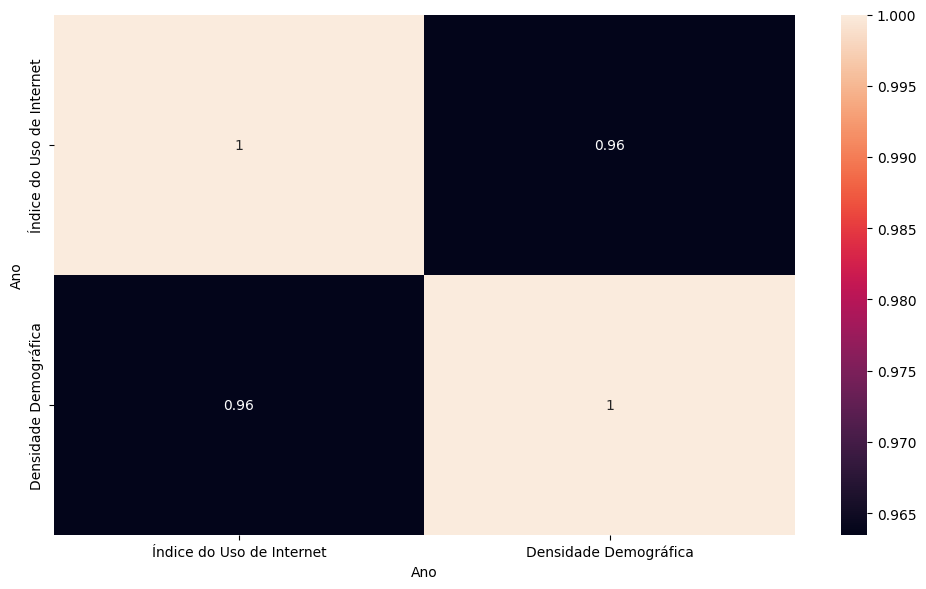

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(corr, annot=True)

fig.savefig('C:/Users/lazar/Master-Dissertation/figuras/internet/correlacao2.png')
plt.tight_layout()
plt.show()